In [1]:
# Main imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from __future__ import division
from __future__ import print_function

# Needed for LineCollections helper functions
from matplotlib.collections import LineCollection

# Angle unit conversion
degtorad = np.pi/180.

In [2]:
#--------------------------------------------------------------------
# Utility Functions
#--------------------------------------------------------------------

def theta2_from_Snells_law(angle1, n1, n2):
    return np.arcsin(np.sin(angle1) * n1 / n2)

def reflectance_TE(angle1, n1, n2):
    angle2 = theta2_from_Snells_law(angle1, n1, n2)
    temp = n1*np.cos(angle1) - n2*np.cos(angle2)
    temp = temp / (n1*np.cos(angle1) + n2*np.cos(angle2))
    return temp**2

def transmittance_TE(angle1, n1, n2):
    return 1.0 - reflectance_TE(angle1, n1, n2)

def reflectance_TM(angle1, n1, n2):
    angle2 = theta2_from_Snells_law(angle1, n1, n2)
    temp = n1*np.cos(angle2) - n2*np.cos(angle1)
    temp = temp / (n1*np.cos(angle2) + n2*np.cos(angle1))
    return temp**2

def transmittance_TM(angle1, n1, n2):
    return 1.0 - reflectance_TM(angle1, n1, n2)

def reflectance_Unpol(angle1, n1, n2):
    rTE = reflectance_TE(angle1, n1, n2)
    rTM = reflectance_TM(angle1, n1, n2)
    return 0.5 * (rTE + rTM)

def transmittance_Unpol(angle1, n1, n2):
    return 1.0 - reflectance_Unpol(angle1, n1, n2)




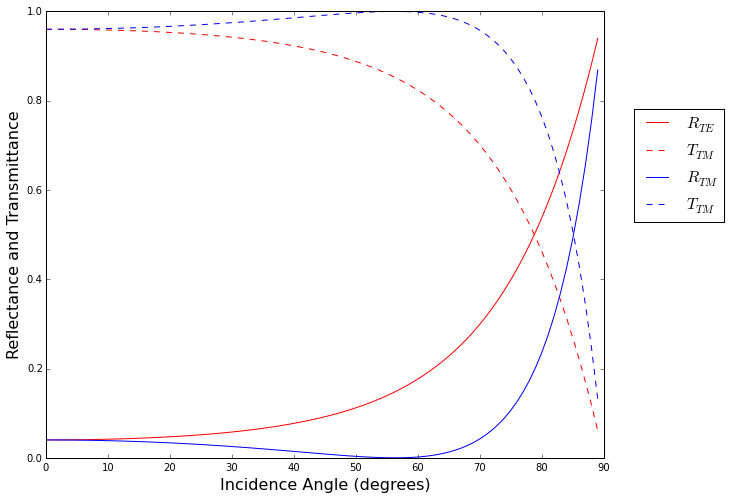

In [11]:
n1 = 1.0
n2 = 1.5
fontsize = 16
angles = []
R_TE = []
T_TE = []
R_TM = []
T_TM = []
R_Unpol = []
T_Unpol = []
for angle in range(0,90,1):
    angles = np.append(angles, angle)
    R_TE = np.append(R_TE, reflectance_TE(angle*degtorad, n1, n2))
    T_TE = np.append(T_TE, transmittance_TE(angle*degtorad, n1, n2))
    R_TM = np.append(R_TM, reflectance_TM(angle*degtorad, n1, n2))
    T_TM = np.append(T_TM, transmittance_TM(angle*degtorad, n1, n2))
    R_Unpol = np.append(R_Unpol, reflectance_Unpol(angle*degtorad, n1, n2))
    T_Unpol = np.append(T_Unpol, transmittance_Unpol(angle*degtorad, n1, n2))
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(angles, R_TE, 'r-', label='$R_{TE}$')
ax.plot(angles, T_TE, 'r--', label='$T_{TM}$')
ax.plot(angles, R_TM, 'b-', label='$R_{TM}$')
ax.plot(angles, T_TM, 'b--', label='$T_{TM}$')
#ax.plot(angles, R_Unpol, label='$R_{unpol}$')
#ax.plot(angles, T_Unpol, label='$R_{unpol}$')
ax.set_xlabel('Incidence Angle (degrees)',fontsize=fontsize)
ax.set_ylabel('Reflectance and Transmittance',fontsize=fontsize)
ax.legend(bbox_to_anchor=(1.23, 0.8),fontsize=fontsize);